In [77]:
from scipy.optimize import linprog  # for solving the LP problems
import numpy as np # for generating random matrices and vectors
import time # Start and end times are recorded to measure how long it takes to solve each problem.
import matplotlib.pyplot as plt
import pandas as pd

## simplex.m

## Experiment 1
**Not all combinations of n and m found an optimal solution**

In [79]:
# Function to generate random LP problems
def generate_random_lp(n, m):
    """
    Generate random linear programming problem parameters.
    n: Number of variables.
    m: Number of constraints.
    Returns coefficients of objective function, constraint matrix, and RHS vector.
    """
    # Random coefficients for the objective function (minimize)
    c = np.random.randint(1, 10, size=n)  

    # Random coefficients for the constraint matrix
    A_eq = np.random.randint(-10, 10, size=(m, n))  

    # Random RHS values, positive to avoid trivial infeasibility
    b_eq = np.random.randint(1, 10, size=m)  

    return c, A_eq, b_eq

# Function to solve LP problems and record execution time
def solve_lp_and_record_results(n_values, m_values, trials=1):
    results = []

    for n in n_values:
        for m in m_values:
            for trial in range(trials):
                # Generate random LP problem
                c, A_eq, b_eq = generate_random_lp(n, m)

                # Record start time
                start_time = time.time()

                # Solve the LP problem
                result = linprog(c, A_eq=A_eq, b_eq=b_eq, method='highs', options={'disp': False})

                # Record end time
                end_time = time.time()
                execution_time = end_time - start_time

                # Record results
                result_data = {
                    'n': n,
                    'm': m,
                    'success': result.success,
                    'status': result.status,
                    'message': result.message,
                    'objective_value': result.fun if result.success else None,
                    'solution': result.x if result.success else None,
                    'execution_time': execution_time
                }

                results.append(result_data)

                # Print summary of the current trial
                print(f"Trial {trial + 1} for n={n}, m={m}:")
                if result.success:
                    print(f"  Optimal solution found. Objective value: {result.fun:.2f}")
                else:
                    print(f"  Problem not solved. Status: {result.message}")
                print(f"  Execution time: {execution_time:.4f} seconds\n")

    return results

# Specify combinations of n and m to test
n_values = [4, 10, 20, 30, 40, 50]  # Different values of n (number of variables)
m_values = [2, 6, 10, 14]  # Different values of m (number of constraints)

# Run the LP solver on the specified combinations and record the results
results = solve_lp_and_record_results(n_values, m_values, trials=1)

# Optionally, summarize the results
print("\nSummary of Results:")
for res in results:
    n = res['n']
    m = res['m']
    execution_time = res['execution_time']
    status = "Success" if res['success'] else "Failure"
    print(f"n={n}, m={m}, Status: {status}, Execution Time: {execution_time:.4f} seconds")


Trial 1 for n=4, m=2:
  Optimal solution found. Objective value: 1.00
  Execution time: 0.0035 seconds

Trial 1 for n=4, m=6:
  Problem not solved. Status: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
  Execution time: 0.0008 seconds

Trial 1 for n=4, m=10:
  Problem not solved. Status: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
  Execution time: 0.0006 seconds

Trial 1 for n=4, m=14:
  Problem not solved. Status: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
  Execution time: 0.0014 seconds

Trial 1 for n=10, m=2:
  Problem not solved. Status: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
  Execution time: 0.0010 seconds

Trial 1 for n=10, m=6:
  Problem not solved. Status: The problem is infeasible. (HiGHS Status 8: model_st

## Experiment 2

To ensure an optimal solution is found, I modified the code to generate random feasible LP problems by creating a feasible solution first and then deriving the constraints based on that solution.

First generating a random feasible solution x_feasible.
Creating constraints A_eq and then computing b_eq as A_eq @ x_feasible to guarantee that the solution is feasible.

By using a feasible solution to derive b_eq, the linear programming problem generated is guaranteed to be feasible, ensuring that an optimal solution can be found.

By ensuring that b_eq is computed using A_eq @ x_feasible, the function guarantees that the generated LP problem is feasible, meaning a solution always exists.

To ensure an optimal solution is found, I modified the code to generate feasible LP problems by:

First generating a random feasible solution (x_feasible).
Creating constraints (A_eq) and deriving b_eq as A_eq @ x_feasible to guarantee feasibility.
This approach ensures that the generated LP problem is always feasible, meaning a solution can always be found.

**This resulted in an optimal solution for all combinations but the values of the objective function were very large**

In [80]:
# Function to generate feasible LP problems
def generate_feasible_lp(n, m):
    """
    Generate a random linear programming problem that is more likely to be feasible.
    n: Number of variables.
    m: Number of constraints.
    Returns coefficients of objective function, constraint matrix, and RHS vector.
    """
    # Random coefficients for the objective function (minimize)
    c = np.random.randint(1, 10, size=n)
    
    # Generate a random feasible solution
    x_feasible = np.random.randint(1, 10, size=n)

    # Random coefficients for the constraint matrix
    A_eq = np.random.randint(-5, 5, size=(m, n))

    # Compute b_eq to ensure feasibility
    b_eq = A_eq @ x_feasible

    return c, A_eq, b_eq

# Function to solve LP problems and record execution time
def solve_lp_and_record_results(n_values, m_values, trials=1):
    results = []

    for n in n_values:
        for m in m_values:
            for trial in range(trials):
                # Generate feasible LP problem
                c, A_eq, b_eq = generate_feasible_lp(n, m)

                # Record start time
                start_time = time.time()

                # Solve the LP problem
                result = linprog(c, A_eq=A_eq, b_eq=b_eq, method='highs', options={'disp': False})

                # Record end time
                end_time = time.time()
                execution_time = end_time - start_time

                # Record results
                result_data = {
                    'n': n,
                    'm': m,
                    'success': result.success,
                    'status': result.status,
                    'message': result.message,
                    'objective_value': result.fun if result.success else None,
                    'solution': result.x if result.success else None,
                    'execution_time': execution_time
                }

                results.append(result_data)

                # Print summary of the current trial
                print(f"Trial {trial + 1} for n={n}, m={m}:")
                if result.success:
                    print(f"  Optimal solution found. Objective value: {result.fun:.2f}")
                else:
                    print(f"  Problem not solved. Status: {result.message}")
                print(f"  Execution time: {execution_time:.4f} seconds\n")

    return results

# Specify combinations of n and m to test
n_values = [4, 10, 20, 30, 40, 50]  # Different values of n (number of variables)
m_values = [2, 6, 10, 14]  # Different values of m (number of constraints)

# Run the LP solver on the specified combinations and record the results
results = solve_lp_and_record_results(n_values, m_values, trials=1)

print("\nSummary of Results:")
for res in results:
    n = res['n']
    m = res['m']
    execution_time = res['execution_time']
    status = "Success" if res['success'] else "Failure"
    print(f"n={n}, m={m}, Status: {status}, Execution Time: {execution_time:.4f} seconds")

Trial 1 for n=4, m=2:
  Optimal solution found. Objective value: 80.00
  Execution time: 0.0015 seconds

Trial 1 for n=4, m=6:
  Optimal solution found. Objective value: 71.00
  Execution time: 0.0017 seconds

Trial 1 for n=4, m=10:
  Optimal solution found. Objective value: 53.00
  Execution time: 0.0017 seconds

Trial 1 for n=4, m=14:
  Optimal solution found. Objective value: 103.00
  Execution time: 0.0015 seconds

Trial 1 for n=10, m=2:
  Optimal solution found. Objective value: 52.70
  Execution time: 0.0013 seconds

Trial 1 for n=10, m=6:
  Optimal solution found. Objective value: 172.55
  Execution time: 0.0012 seconds

Trial 1 for n=10, m=10:
  Optimal solution found. Objective value: 247.00
  Execution time: 0.0016 seconds

Trial 1 for n=10, m=14:
  Optimal solution found. Objective value: 128.00
  Execution time: 0.0011 seconds

Trial 1 for n=20, m=2:
  Optimal solution found. Objective value: 34.39
  Execution time: 0.0008 seconds

Trial 1 for n=20, m=6:
  Optimal solution 

## Experiment #3

Since the goal of LP minimization problems is to find the smallest possible value of the objective function that satisfies all of the given constraints, I made modifications aimed at limiting the possible values of the decision variables, and the contribution of each to the overall objective function, making it more likely to obtain a lower (more optimal) objective function value. I narrowed the ranges for the objective function (c), the constraint coefficients (A_eq), and the feasible solution (x_feasible).

In [136]:
# Function to generate feasible LP problems
def generate_feasible_lp(n, m):
    """
    Generate a random linear programming problem that is more likely to be feasible.
    n: Number of variables.
    m: Number of constraints.
    Returns coefficients of objective function, constraint matrix, and RHS vector.
    """
    # Generate a random feasible solution
    x_feasible = np.random.randint(1, 5, size=n)

    # Generate random coefficients for A_eq
    A_eq = np.random.randint(-3, 3, size=(m, n))

    # Compute b_eq to ensure feasibility
    b_eq = A_eq @ x_feasible

    # Generate a random objective function
    c = np.random.randint(1, 2, size=n)

    return c, A_eq, b_eq

# Function to solve LP problems and record execution time
def solve_lp_and_record_results(n_values, m_values, trials=1):
    results = []

    for n in n_values:
        for m in m_values:
            for trial in range(trials):
                # Bounds for each variable (all variables must be non-negative, xi >= 0)
                x_bounds = (0, 5)  # Bounds for each variable (0 to 10)
                
                # Generate feasible LP problem
                c, A_eq, b_eq = generate_feasible_lp(n, m)

                # Define bounds for each variable to keep them small
                bounds = [(0, 5) for _ in range(n)]
                
                # Record start time
                start_time = time.time()

                # Solve the LP problem
                result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs', options={'disp': False})

                # Record end time
                end_time = time.time()
                execution_time = end_time - start_time

                # Record results
                result_data = {
                    'n': n,
                    'm': m,
                    'success': result.success,
                    'status': result.status,
                    'message': result.message,
                    'objective_value': result.fun if result.success else None,
                    'solution': result.x if result.success else None,
                    'execution_time': execution_time
                }

                results.append(result_data)

                # Print summary of the current trial
                print(f"Trial {trial + 1} for n={n}, m={m}:")
                if result.success:
                    print(f"  Optimal solution found. Objective value: {result.fun:.2f}")
                else:
                    print(f"  Problem not solved. Status: {result.message}")
                print(f"  Execution time: {execution_time:.4f} seconds\n")

    return results

# Specify combinations of n and m to test
n_values = [4, 10, 20, 30, 40, 50]  # Different values of n (number of variables)
m_values = [2, 6, 10, 14]  # Different values of m (number of constraints)

# Run the LP solver on the specified combinations and record the results
results = solve_lp_and_record_results(n_values, m_values, trials=1)

print("\nSummary of Results:")
for res in results:
    n = res['n']
    m = res['m']
    execution_time = res['execution_time']
    status = "Success" if res['success'] else "Failure"
    print(f"n={n}, m={m}, Status: {status}, Execution Time: {execution_time:.4f} seconds")

Trial 1 for n=4, m=2:
  Optimal solution found. Objective value: 7.00
  Execution time: 0.0018 seconds

Trial 1 for n=4, m=6:
  Optimal solution found. Objective value: 10.00
  Execution time: 0.0010 seconds

Trial 1 for n=4, m=10:
  Optimal solution found. Objective value: 8.00
  Execution time: 0.0009 seconds

Trial 1 for n=4, m=14:
  Optimal solution found. Objective value: 6.00
  Execution time: 0.0014 seconds

Trial 1 for n=10, m=2:
  Optimal solution found. Objective value: 8.00
  Execution time: 0.0016 seconds

Trial 1 for n=10, m=6:
  Optimal solution found. Objective value: 17.99
  Execution time: 0.0012 seconds

Trial 1 for n=10, m=10:
  Optimal solution found. Objective value: 24.00
  Execution time: 0.0009 seconds

Trial 1 for n=10, m=14:
  Optimal solution found. Objective value: 22.00
  Execution time: 0.0010 seconds

Trial 1 for n=20, m=2:
  Optimal solution found. Objective value: 4.80
  Execution time: 0.0007 seconds

Trial 1 for n=20, m=6:
  Optimal solution found. Ob

## Experiment #4

Increased the trials for each n and m combo from 1 to 5 to calculate the average runtime.

This way, you'll be able to observe how the solver performs across different random instances of LP problems and get a sense of the variability in execution time.

In [161]:
# Function to generate feasible LP problems
def generate_feasible_lp(n, m):
    """
    Generate a random linear programming problem that is more likely to be feasible.
    n: Number of variables.
    m: Number of constraints.
    Returns coefficients of objective function, constraint matrix, and RHS vector.
    """
    # Generate a random feasible solution
    x_feasible = np.random.randint(1, 5, size=n)

    # Generate random coefficients for A_eq
    A_eq = np.random.randint(-3, 3, size=(m, n))

    # Compute b_eq to ensure feasibility
    b_eq = A_eq @ x_feasible

    # Generate a random objective function
    c = np.random.randint(1, 2, size=n)

    return c, A_eq, b_eq

# Solve LP Problems. Calculate average execution time
def solve_lp(n_values, m_values, trials=1): # runs each combo 5 times to average out variations in runtime
    results = []

    # iterates through different combinations of variables and constraints
    for n in n_values: # variables
        for m in m_values: # constraints
            total_run_time = 0

            for trial in range(trials):
                # Bounds for each variable (all variables must be non-negative, xi >= 0)
                x_bounds = (0, 5)  # Bounds for each variable (0 to 10)
                
                # Generate feasible LP problem
                c, A_eq, b_eq = generate_feasible_lp(n, m)

                # start time stamp
                start = time.time()

                # Scipy linprog function with 'highs' solver
                result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})

                # end time stamp
                end = time.time()
                run_time = end - start
                total_run_time += run_time

                # Print summary of the current trial
                print(f"Trial {trial + 1} for n={n}, m={m}:")
                print("  Problem Instance:")
                print(f"    Objective Function (c): {c}")
                print(f"    Constraint Matrix (A_eq):\n{A_eq}")
                print(f"    Right-hand Side (b_eq): {b_eq}")
                
                if result.success:
                    print(f"  Optimal solution found. Objective value: {result.fun:.2f}")
                else:
                    print(f"  Problem not solved. Status: {result.message}")
                print(f" Execution time: {run_time:.4f} seconds\n")

            # Calculate average run time for the current combination of n and m
            avg_run_time = total_run_time / trials
            print(f"Average execution time for n={n}, m={m}: {avg_run_time:.4f} seconds\n")

            # Store the average run time results for each combination of n and m
            results.append({
                'n': n,
                'm': m,
                'avg_run_time': avg_run_time,
                'last_trial_problem': {
                    'c': c,
                    'A_eq': A_eq,
                    'b_eq': b_eq,
                    'solution': result.x if result.success else None,
                    'objective_value': result.fun if result.success else None,
                    'status': result.success
                }
            })

    return results

# specify combinations of n and m to test
n_values = [4, 10, 20, 30, 40, 50]  # Different number of variables
m_values = [2, 6, 10, 14]  # Different number of constraints

# Run the LP solver on the specified combinations and record the results
results = solve_lp(n_values, m_values, trials=1)

print("\nSummary of Results:")
for result in results:
    n = result['n']
    m = result['m']
    avg_run_time = result['avg_run_time']
    print(f"n={n}, m={m}, Average Execution Time: {avg_run_time:.4f} seconds")
    print("  Problem Instance:")
    print(f"    Objective Function (c): {result['last_trial_problem']['c']}")
    print(f"    Constraint Matrix (A_eq):\n{result['last_trial_problem']['A_eq']}")
    print(f"    Right-hand Side (b_eq): {result['last_trial_problem']['b_eq']}")
    if result['last_trial_problem']['status']:
        print(f"  Optimal solution (x): {result['last_trial_problem']['solution']}")
        print(f"  Optimal objective value: {result['last_trial_problem']['objective_value']:.2f}\n")
    else:
        print("  Problem was not solved successfully.\n")

/var/folders/jy/_6_zy5g51z34vxkggr98yhw80000gn/T/ipykernel_20606/2823821637.py:43: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})
/var/folders/jy/_6_zy5g51z34vxkggr98yhw80000gn/T/ipykernel_20606/2823821637.py:43: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})


Trial 1 for n=4, m=2:
  Problem Instance:
    Objective Function (c): [1 1 1 1]
    Constraint Matrix (A_eq):
[[-1  1 -3  1]
 [-3 -3 -1  0]]
    Right-hand Side (b_eq): [ -1 -10]
  Optimal solution found. Objective value: 3.33
 Execution time: 0.0083 seconds

Average execution time for n=4, m=2: 0.0083 seconds

Trial 1 for n=4, m=6:
  Problem Instance:
    Objective Function (c): [1 1 1 1]
    Constraint Matrix (A_eq):
[[-2 -2  2  2]
 [-2  0  2 -1]
 [-3  0  1  2]
 [-1 -2 -3  2]
 [-1 -3 -1 -2]
 [-3 -3  0  2]]
    Right-hand Side (b_eq): [ -2  -3  -2 -18 -26 -18]
  Optimal solution found. Objective value: 15.00
 Execution time: 0.0044 seconds

Average execution time for n=4, m=6: 0.0044 seconds

Trial 1 for n=4, m=10:
  Problem Instance:
    Objective Function (c): [1 1 1 1]
    Constraint Matrix (A_eq):
[[ 1 -1  0 -3]
 [-2  2 -3  0]
 [ 0  1  2 -3]
 [ 2 -2  0 -1]
 [-1  0 -3  1]
 [ 1 -3  2 -1]
 [-3  0  1  0]
 [ 2  2 -3 -2]
 [-1 -2  1 -1]
 [ 0 -2 -1  2]]
    Right-hand Side (b_eq): [-14  -

# Part 4
**Tabulate and graph the time versus m and n**

In [154]:
# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Display the results in tabular form
print("\nAverage Runtime Results for LP Solver:")
print(df_results)


Average Runtime Results for LP Solver:
     n   m  avg_run_time
0    4   2      0.005046
1    4   6      0.003364
2    4  10      0.002993
3    4  14      0.003378
4   10   2      0.005316
5   10   6      0.006652
6   10  10      0.005802
7   10  14      0.006120
8   20   2      0.013206
9   20   6      0.014427
10  20  10      0.015312
11  20  14      0.016742
12  30   2      0.018414
13  30   6      0.026647
14  30  10      0.026781
15  30  14      0.032880
16  40   2      0.026688
17  40   6      0.037202
18  40  10      0.043671
19  40  14      0.047526
20  50   2      0.038345
21  50   6      0.049075
22  50  10      0.056983
23  50  14      0.079626


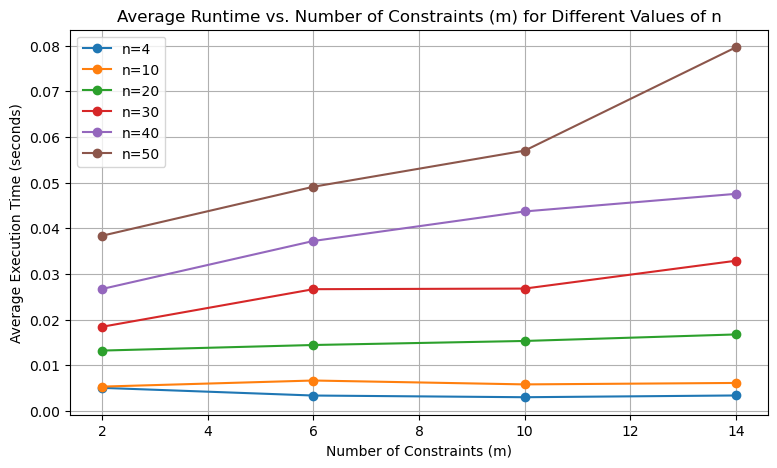

In [155]:
# Plot the average runtime versus m and n
plt.figure(figsize=(9, 5))
for n in n_values:
    subset = df_results[df_results['n'] == n]
    plt.plot(subset['m'].to_numpy(), subset['avg_run_time'].to_numpy(), marker='o', label=f'n={n}')

plt.xlabel('Number of Constraints (m)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Runtime vs. Number of Constraints (m) for Different Values of n')
plt.legend()
plt.grid(True)
plt.show()

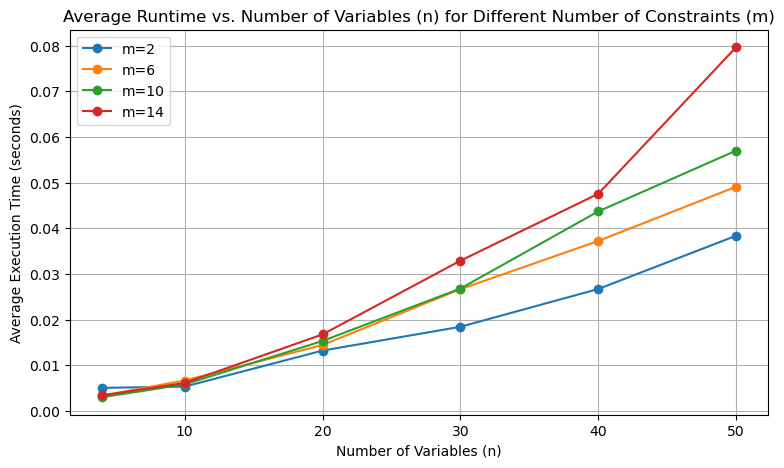

In [158]:
# Plot the average runtime versus n and m
plt.figure(figsize=(9, 5))

# Iterate over different values of m to plot average runtime for each
for m in m_values:
    subset = df_results[df_results['m'] == m]
    plt.plot(subset['n'].to_numpy(), subset['avg_run_time'].to_numpy(), marker='o', label=f'm={m}')

plt.xlabel('Number of Variables (n)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Runtime vs. Number of Variables (n) for Different Number of Constraints (m)')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
# Function to generate feasible LP problems
def generate_feasible_lp(n, m):
    """
    Generate a random linear programming problem that is more likely to be feasible.
    n: Number of variables.
    m: Number of constraints.
    Returns coefficients of objective function, constraint matrix, and RHS vector.
    """
    # Generate a random feasible solution
    x_feasible = np.random.randint(1, 5, size=n)

    # Generate random coefficients for A_eq
    A_eq = np.random.randint(-3, 3, size=(m, n))

    # Compute b_eq to ensure feasibility
    b_eq = A_eq @ x_feasible

    # Generate a random objective function
    c = np.random.randint(1, 2, size=n)

    return c, A_eq, b_eq

# Function to format the constraints into readable equations
def format_constraints(A_eq, b_eq):
    """
    Format the constraint matrix and right-hand side as readable equations.
    """
    constraints = []
    m, n = A_eq.shape

    for i in range(m):
        equation_terms = []
        for j in range(n):
            coefficient = A_eq[i, j]
            if coefficient != 0:
                sign = " + " if coefficient > 0 and j > 0 else ""
                equation_terms.append(f"{sign}{coefficient}x_{j + 1}")
        
        rhs = b_eq[i]
        equation_str = " ".join(equation_terms) + f" = {rhs}"
        constraints.append(equation_str)

    return "\n".join(constraints)

# Solve LP Problems. Calculate average execution time
def solve_lp(n_values, m_values, trials=1): # runs each combo 5 times to average out variations in runtime
    results = []

    # iterates through different combinations of variables and constraints
    for n in n_values: # variables
        for m in m_values: # constraints
            total_run_time = 0

            for trial in range(trials):
                # Bounds for each variable (all variables must be non-negative, xi >= 0)
                x_bounds = (0, 5)  # Bounds for each variable (0 to 10)
                
                # Generate feasible LP problem
                c, A_eq, b_eq = generate_feasible_lp(n, m)

                # start time stamp
                start = time.time()

                # Scipy linprog function with 'highs' solver
                result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})

                # end time stamp
                end = time.time()
                run_time = end - start
                total_run_time += run_time

                # Print the formatted constraint equations
                print(f"  Problem Instance for n={n}, m={m}:")
                print("  Subject to:")
                formatted_constraints = format_constraints(A_eq, b_eq)
                print(f"  {formatted_constraints}\n")
                
                # Print summary of the current trial
                print(f"    Objective Function (c): {c}")
                print("    Constraint Matrix (A_eq):")
                print(A_eq)
                print("    Right-hand Side (b_eq):")
                print(b_eq)
                
                

                if result.success:
                    print(f"  Optimal solution found. Objective value: {result.fun:.2f}")
                else:
                    print(f"  Problem not solved. Status: {result.message}")
                print(f"  Execution time: {run_time:.4f} seconds\n")

            # Calculate average run time for the current combination of n and m
            avg_run_time = total_run_time / trials
            print(f"Average execution time for n={n}, m={m}: {avg_run_time:.4f} seconds\n")

            # Store the average run time results for each combination of n and m
            results.append({
                'n': n,
                'm': m,
                'avg_run_time': avg_run_time
            })

    return results

# specify combinations of n and m to test
n_values = [4, 10, 20, 30, 40, 50]  # Different number of variables
m_values = [2, 6, 10, 14]  # Different number of constraints

# Run the LP solver on the specified combinations and record the results
results = solve_lp(n_values, m_values, trials=1)

print("\nSummary of Results:")
for result in results:
    n = result['n']
    m = result['m']
    avg_run_time = result['avg_run_time']
    print(f"n={n}, m={m}, Average Execution Time: {avg_run_time:.4f} seconds")


/var/folders/jy/_6_zy5g51z34vxkggr98yhw80000gn/T/ipykernel_20606/4290252626.py:65: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})
/var/folders/jy/_6_zy5g51z34vxkggr98yhw80000gn/T/ipykernel_20606/4290252626.py:65: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})


  Problem Instance for n=4, m=2:
  Subject to:
  -1x_1 -2x_2  + 1x_3  + 2x_4 = 3
-1x_1 -2x_2 -1x_3  + 1x_4 = -3

    Objective Function (c): [1 1 1 1]
    Constraint Matrix (A_eq):
[[-1 -2  1  2]
 [-1 -2 -1  1]]
    Right-hand Side (b_eq):
[ 3 -3]
  Optimal solution found. Objective value: 3.00
  Execution time: 0.0060 seconds

Average execution time for n=4, m=2: 0.0060 seconds

  Problem Instance for n=4, m=6:
  Subject to:
  -1x_1  + 2x_2 = 1
-3x_1 -1x_2  + 1x_3  + 1x_4 = -6
-3x_1 -1x_2 -3x_3 = -17
1x_1 -1x_2 -3x_3  + 1x_4 = -2
2x_1 -3x_2 -1x_3 -2x_4 = -8
2x_1 -2x_2 -2x_3 -2x_4 = -8

    Objective Function (c): [1 1 1 1]
    Constraint Matrix (A_eq):
[[-1  2  0  0]
 [-3 -1  1  1]
 [-3 -1 -3  0]
 [ 1 -1 -3  1]
 [ 2 -3 -1 -2]
 [ 2 -2 -2 -2]]
    Right-hand Side (b_eq):
[  1  -6 -17  -2  -8  -8]
  Optimal solution found. Objective value: 10.00
  Execution time: 0.0064 seconds

Average execution time for n=4, m=6: 0.0064 seconds

  Problem Instance for n=4, m=10:
  Subject to:
  -3x_1 -

In [177]:
# Function to generate feasible LP problems
def generate_feasible_lp(n, m):
    """
    Generate a random linear programming problem that is more likely to be feasible.
    n: Number of variables.
    m: Number of constraints.
    Returns coefficients of objective function, constraint matrix, and RHS vector.
    """
    # Generate a random feasible solution
    x_feasible = np.random.randint(1, 5, size=n)

    # Generate random coefficients for A_eq
    A_eq = np.random.randint(-3, 3, size=(m, n))

    # Compute b_eq to ensure feasibility
    b_eq = A_eq @ x_feasible

    # Generate a random objective function
    c = np.random.randint(1, 2, size=n)

    return c, A_eq, b_eq

# Function to format the objective function and constraints
def format_objective_function(c):
    """
    Format the objective function as a readable equation.
    """
    objective_terms = []
    n = len(c)

    for j in range(n):
        coefficient = c[j]
        if coefficient != 0:
            sign = " + " if j > 0 else ""
            objective_terms.append(f"{sign}{coefficient}x_{j + 1}")

    return "min " + " ".join(objective_terms)

def format_constraints(A_eq, b_eq):
    """
    Format the constraint matrix and right-hand side as readable equations.
    """
    constraints = []
    m, n = A_eq.shape

    for i in range(m):
        equation_terms = []
        for j in range(n):
            coefficient = A_eq[i, j]
            if coefficient != 0:
                sign = " + " if coefficient > 0 and j > 0 else ""
                equation_terms.append(f"{sign}{coefficient}x_{j + 1}")
        
        rhs = b_eq[i]
        equation_str = " ".join(equation_terms) + f" = {rhs}"
        constraints.append(equation_str)

    return "\n".join(constraints)

# Solve LP Problems. Calculate average execution time
def solve_lp(n_values, m_values, trials=1): # runs each combo 5 times to average out variations in runtime
    results = []

    # iterates through different combinations of variables and constraints
    for n in n_values: # variables
        for m in m_values: # constraints
            total_run_time = 0

            for trial in range(trials):
                # Bounds for each variable (all variables must be non-negative, xi >= 0)
                x_bounds = (0, 5)  # Bounds for each variable (0 to 10)
                
                # Generate feasible LP problem
                c, A_eq, b_eq = generate_feasible_lp(n, m)

                # start time stamp
                start = time.time()

                # Scipy linprog function with 'highs' solver
                result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})

                # end time stamp
                end = time.time()
                run_time = end - start
                total_run_time += run_time

                # Print summary of the current trial
                print(f"  Problem Instance for n={n}, m={m}:")

                # Print the formatted objective function
                formatted_objective = format_objective_function(c)
                print(f"    {formatted_objective}")

                # Print the formatted constraint equations
                formatted_constraints = format_constraints(A_eq, b_eq)
                print("\n  Subject to:")
                print(f"  {formatted_constraints}\n")
                
                # Print summary of the current trial
                print(f"    Objective Function (c): {c}")
                print("    Constraint Matrix (A_eq):")
                print(A_eq)
                print("    Right-hand Side (b_eq):")
                print(b_eq)

                if result.success:
                    print(f"  Optimal solution found. Objective value: {result.fun:.2f}")
                else:
                    print(f"  Problem not solved. Status: {result.message}")
                print(f"  Execution time: {run_time:.4f} seconds\n")

            # Calculate average run time for the current combination of n and m
            avg_run_time = total_run_time / trials
            print(f"Average execution time for n={n}, m={m}: {avg_run_time:.4f} seconds\n")

            # Store the average run time results for each combination of n and m
            results.append({
                'n': n,
                'm': m,
                'avg_run_time': avg_run_time
            })

    return results

# specify combinations of n and m to test
n_values = [4, 10, 20, 30, 40, 50]  # Different number of variables
m_values = [2, 6, 10, 14]  # Different number of constraints

# Run the LP solver on the specified combinations and record the results
results = solve_lp(n_values, m_values, trials=1)

print("\nSummary of Results:")
for result in results:
    n = result['n']
    m = result['m']
    avg_run_time = result['avg_run_time']
    print(f"n={n}, m={m}, Average Execution Time: {avg_run_time:.4f} seconds")


/var/folders/jy/_6_zy5g51z34vxkggr98yhw80000gn/T/ipykernel_20606/350381505.py:80: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})
/var/folders/jy/_6_zy5g51z34vxkggr98yhw80000gn/T/ipykernel_20606/350381505.py:80: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='simplex', options={'disp': False})


  Problem Instance for n=4, m=2:
    min 1x_1  + 1x_2  + 1x_3  + 1x_4

  Subject to:
  2x_1 -3x_2  + 2x_3 -1x_4 = 10
-2x_1 -2x_2 -3x_3 = -19

    Objective Function (c): [1 1 1 1]
    Constraint Matrix (A_eq):
[[ 2 -3  2 -1]
 [-2 -2 -3  0]]
    Right-hand Side (b_eq):
[ 10 -19]
  Optimal solution found. Objective value: 7.00
  Execution time: 0.0068 seconds

Average execution time for n=4, m=2: 0.0068 seconds

  Problem Instance for n=4, m=6:
    min 1x_1  + 1x_2  + 1x_3  + 1x_4

  Subject to:
  2x_1  + 1x_2  + 1x_3  + 2x_4 = 18
 + 1x_2 -2x_3 -1x_4 = -2
1x_1 -3x_2  + 2x_3 -2x_4 = -8
-3x_1  + 1x_2 -1x_3 -2x_4 = -14
2x_1 -2x_2  + 2x_3 -2x_4 = 0
 + 2x_2  + 1x_3  + 2x_4 = 14

    Objective Function (c): [1 1 1 1]
    Constraint Matrix (A_eq):
[[ 2  1  1  2]
 [ 0  1 -2 -1]
 [ 1 -3  2 -2]
 [-3  1 -1 -2]
 [ 2 -2  2 -2]
 [ 0  2  1  2]]
    Right-hand Side (b_eq):
[ 18  -2  -8 -14   0  14]
  Optimal solution found. Objective value: 12.00
  Execution time: 0.0071 seconds

Average execution time 

# 